In [67]:
import matplotlib.pyplot as plt             
from tabulate import tabulate              
import matplotlib as mat                   
import seaborn as sns                      
import pandas as pd 
import numpy as np

In [5]:
df = pd.read_csv("card_data.csv")

In [6]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1


In [7]:
df.shape

(100000, 24)

In [8]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE GENDER Car House  CNT_CHILDREN  \
0          100002       1         Cash loans      M   N     Y             0   
1          100003       0         Cash loans      F   N     N             0   
2          100004       0    Revolving loans      M   Y     Y             0   
3          100006       0         Cash loans      F   N     Y             0   
4          100007       0         Cash loans      M   N     Y             0   
...           ...     ...                ...    ...  ..   ...           ...   
99995      216086       0         Cash loans      F   N     Y             1   
99996      216087       0         Cash loans      F   N     Y             1   
99997      216088       0         Cash loans      F   Y     Y             0   
99998      216089       0         Cash loans      F   Y     N             0   
99999      216090       0    Revolving loans      M   Y     Y             0   

       AMT_INCOME_T

In [10]:
df.isnull().sum()

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [11]:
a= df.select_dtypes(exclude='object')
b= df.select_dtypes(include='object')

a_lst=list(a.columns)
b_lst=list(b.columns)

table= [b_lst,a_lst]

print(tabulate({"Categorical":b_lst,
               "numerical":a_lst},headers=["categorical","numerical"]))

categorical          numerical
-------------------  -------------------
NAME_CONTRACT_TYPE   SK_ID_CURR
GENDER               TARGET
Car                  CNT_CHILDREN
House                AMT_INCOME_TOTAL
NAME_TYPE_SUITE      AMT_CREDIT
NAME_INCOME_TYPE     AMT_GOODS_PRICE
NAME_EDUCATION_TYPE  DAYS_EMPLOYED
NAME_FAMILY_STATUS   MOBILE
OCCUPATION_TYPE      WORK_PHONE
APPLICATION_DAY      HOME_PHONE
                     MOBILE_REACHABLE
                     FLAG_EMAIL
                     CNT_FAM_MEMBERS
                     TOTAL_DOC_SUBMITTED


In [12]:
def info_of_cat(col): 
    print (f"Unique values in {col} are: {df[col].unique()}") 
    print(f"Mode of {col} is {df[col].mode()[0]}")
    print (f"Number of missing values in (col) is {df[col].isnull().sum()}")
    if df[col].isnull().sum() > 0:
        print("\nThere are null values in the {col} column")

In [13]:
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [14]:
info_of_cat("NAME_CONTRACT_TYPE")

Unique values in NAME_CONTRACT_TYPE are: ['Cash loans' 'Revolving loans']
Mode of NAME_CONTRACT_TYPE is Cash loans
Number of missing values in (col) is 0


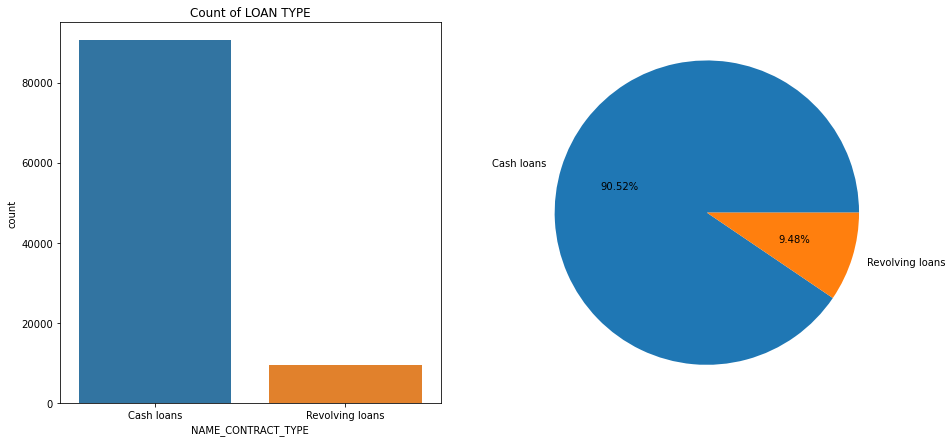

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of LOAN TYPE")               
percentage = df["NAME_CONTRACT_TYPE"].value_counts()         
labels = list(df["NAME_CONTRACT_TYPE"].value_counts().index)

sns.countplot(x = df["NAME_CONTRACT_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

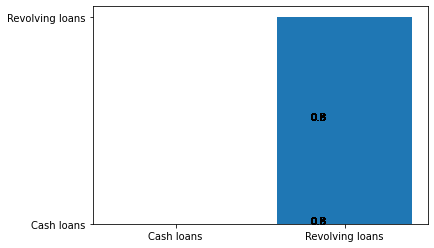

In [23]:
bars = plt.bar(df['NAME_CONTRACT_TYPE'],df['NAME_CONTRACT_TYPE'])

for  bar in bars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    plt.text(width, label_y, s=f'{width}')
    
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize= (10, 7))
ax = sns.countplot(x = df["Gender"])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40 , ha = "right") # set_xticklabels is used to set the labels of the x axis
                                                                       # ax.get_xtickslabels() returns all the labels that we need to print
                                                                       # rotation: rotate the xlabels at angle provided, and
                                                                       # ha: Horizontal axis:-> how you want to keep it. can be changed to center, left, right
count = len(df["Gender"])                                     # counting the number of rows in whole dataset
for bar in ax.patches:                                                 # ax.patches returns the rectange object from matplotlib 
    percentage = f"{round((bar.get_height()/count)*100, 2)} %"           # first it calculate the bar heightand then dividing by the number of row(to calculate percentage)
                                                                            # in data and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                                # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                                # get_height: returns height of rectangle bar.
    ax.annotate(percentage, (x, y), ha = "center", va = "top")          # va: Vertical axis: -> top means percentage would bneath the bar head
                                                                        # annotate: used to annotate over objects. here objects are the bars 
plt.show()

In [29]:
num = int(input("Enter a number: "))
if (num % 2) == 0:
   print(num," is Even")
else:
   print(num," is Odd")

Enter a number: 4
4  is Even


In [16]:
info_of_cat("GENDER")

Unique values in GENDER are: ['M' 'F' 'XNA']
Mode of GENDER is F
Number of missing values in (col) is 0


In [17]:
df.loc[df['GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,337500.0,...,-10044,1,1,1,1,0,NaN,2.0,TUESDAY,0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,225000.0,...,-2797,1,1,1,1,0,Low-skill Laborers,4.0,FRIDAY,0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,225000.0,...,-1228,1,1,1,1,0,Core staff,3.0,THURSDAY,0


In [20]:
gd= df[df['GENDER'] != 'XNA' ]
gd

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,1129500.0,...,-1188,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,135000.0,...,-225,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,297000.0,...,-3039,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,513000.0,...,-3038,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,216086,0,Cash loans,F,N,Y,1,157500.0,755190.0,675000.0,...,-232,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,216087,0,Cash loans,F,N,Y,1,225000.0,284400.0,225000.0,...,-182,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,216088,0,Cash loans,F,Y,Y,0,135000.0,1262583.0,1102500.0,...,-4805,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,216089,0,Cash loans,F,Y,N,0,135000.0,225000.0,225000.0,...,-340,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


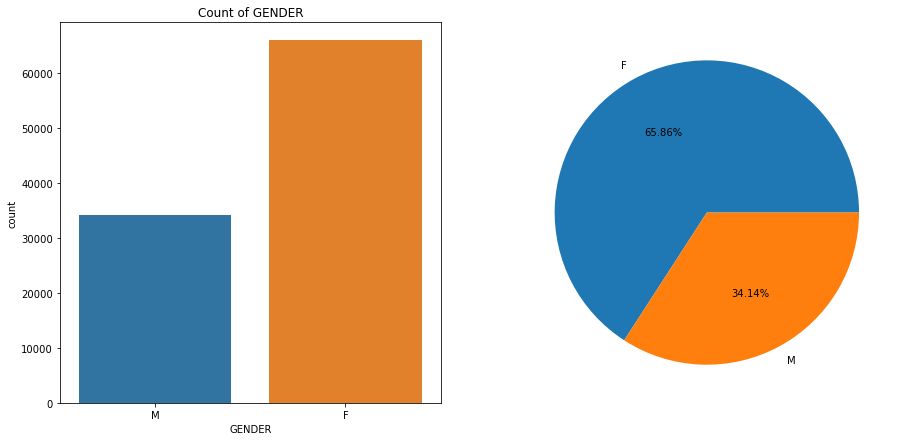

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of GENDER")               
percentage = gd["GENDER"].value_counts()         
labels = list(gd["GENDER"].value_counts().index)

sns.countplot(x = gd["GENDER"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

In [26]:
print(df.groupby('OCCUPATION_TYPE'))

In [ ]:
ct=pd.pivot_table(data=df,
index='city',
values=['area','rent amount (R$)','property tax (R$)','fire insurance (R$)','total (R$)'],
aggfunc='mean',
margins=True,
margins_name='Avg')

In [28]:
for p in ax.patches:
   ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of INCOME TYPES")               
percentage = gd["NAME_INCOME_TYPE"].value_counts()         
labels = list(gd["NAME_INCOME_TYPE"].value_counts().index)

sns.countplot(x = gd["NAME_INCOME_TYPE"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'patches'

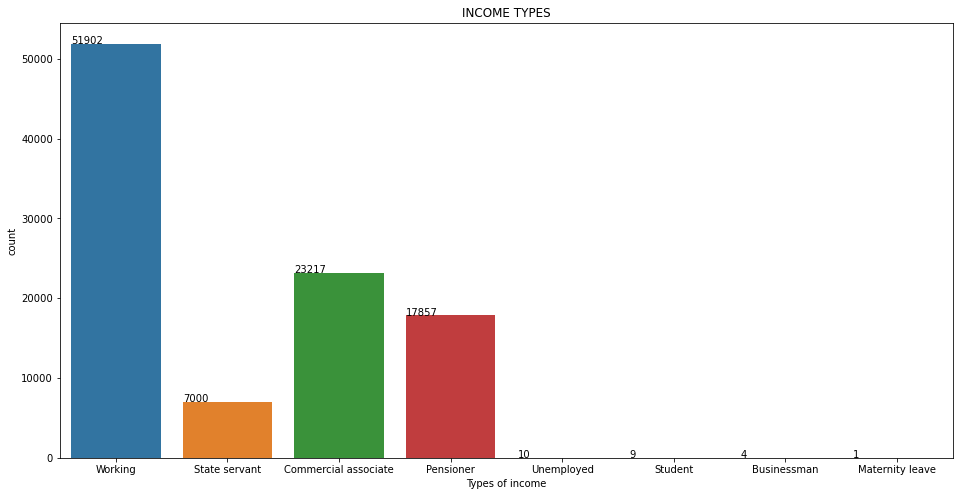

In [40]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x="NAME_INCOME_TYPE", data=df)
plt.title('INCOME TYPES')
plt.xlabel('Types of income')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))

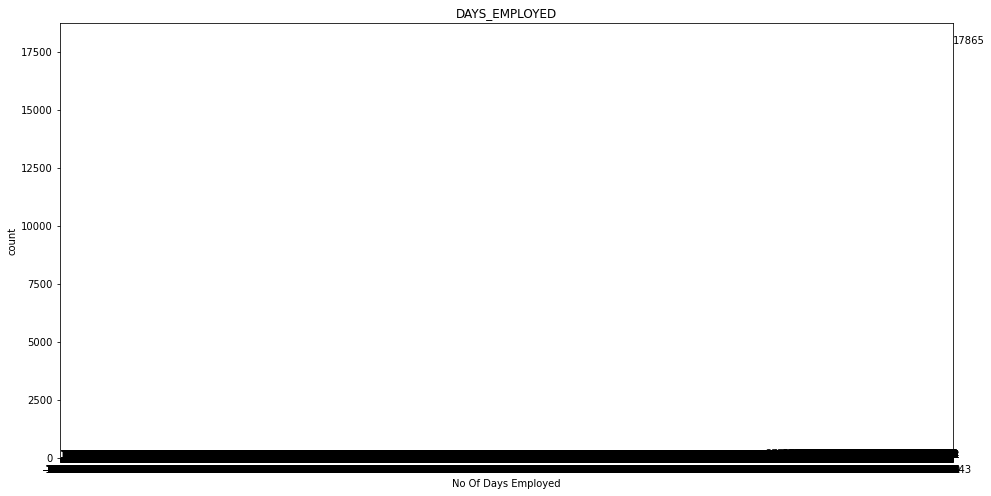

In [45]:

plt.figure(figsize=(16,8))
ax = sns.countplot(x="DAYS_EMPLOYED", data=df)
plt.title('DAYS_EMPLOYED')
plt.xlabel('No Of Days Employed')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))

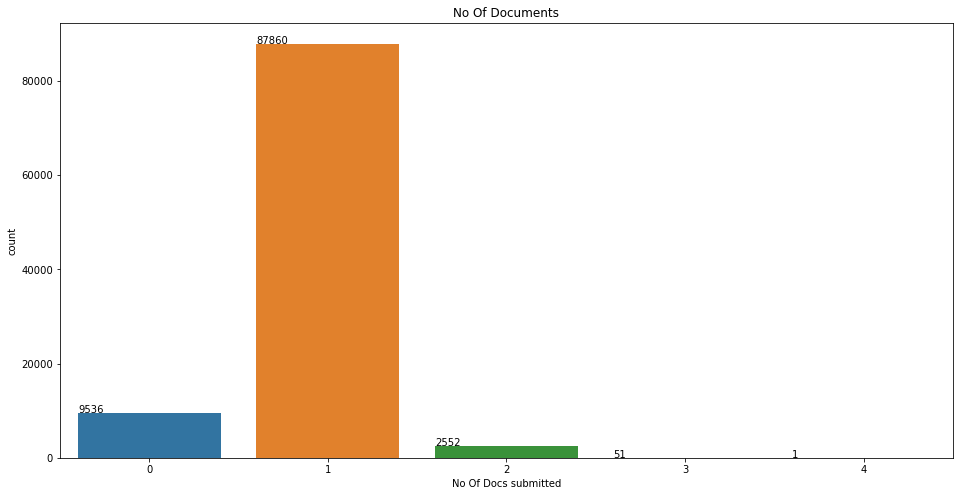

In [53]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x="TOTAL_DOC_SUBMITTED", data=df)
plt.title('No Of Documents')
plt.xlabel('No Of Docs submitted')
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))

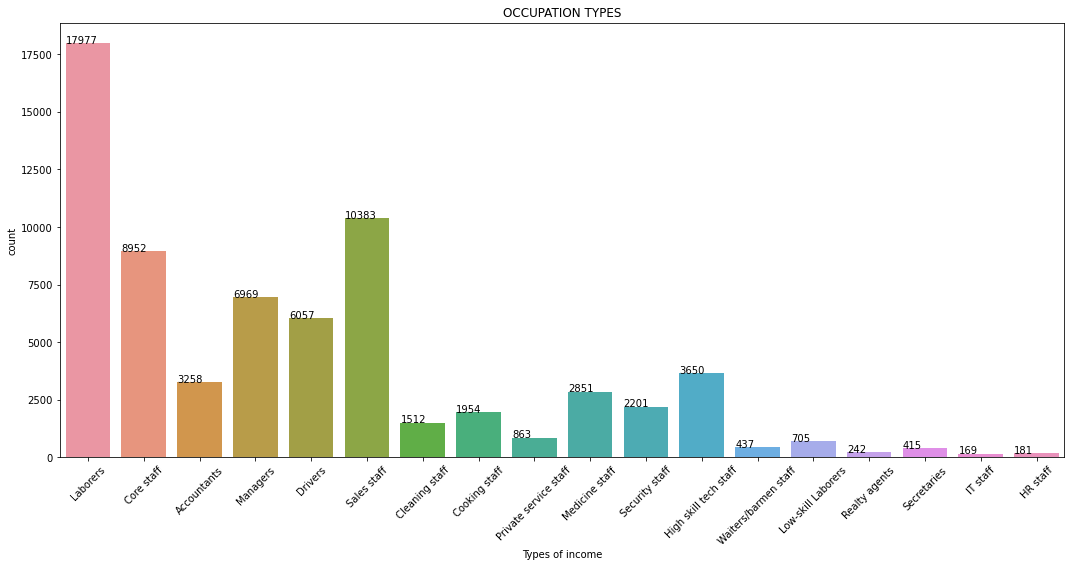

In [50]:
plt.figure(figsize=(18,8))
ax = sns.countplot(x="OCCUPATION_TYPE", data=df)
plt.title('OCCUPATION TYPES')
plt.xlabel('Types of income')
plt.xticks(rotation=45)
plt.ylabel('count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))

In [ ]:
df.groupby('city').agg({'property tax (R$)': ['mean', 'min', 'max']})

In [55]:
ct=pd.pivot_table(data=df,
index='OCCUPATION_TYPE',
values=['House','Car'],
aggfunc='count',
margins=True,
margins_name='count')

ct

,Car,House
OCCUPATION_TYPE,,
Accountants,3258,3258
Cleaning staff,1512,1512
Cooking staff,1954,1954
Core staff,8952,8952
Drivers,6057,6057
HR staff,181,181
High skill tech staff,3650,3650
IT staff,169,169
Laborers,17977,17977


In [56]:
df.groupby('OCCUPATION_TYPE').agg({'AMT_INCOME_TOTAL': ['mean', 'min', 'max']})

AMT_INCOME_TOTAL                      
                                  mean      min          max
OCCUPATION_TYPE                                             
Accountants              192833.988950  31500.0    2214117.0
Cleaning staff           129830.077381  25650.0     540000.0
Cooking staff            137185.701126  27000.0     495000.0
Core staff               171825.151609  27000.0    3375000.0
Drivers                  186656.907875  45000.0     900000.0
HR staff                 178856.229282  54000.0     675000.0
High skill tech staff    183203.103021  31500.0    1350000.0
IT staff                 204512.591716  71550.0     675000.0
Laborers                 170401.647939  27000.0  117000000.0
Low-skill Laborers       130642.678723  36000.0     405000.0
Managers                 265472.439537  27000.0    9000000.0
Medicine staff           150197.653806  31500.0    1350000.0
Private service staff    178058.601970  45000.0     675000.0
Realty agents            191556.818182  76500.0     675000.0
Sales staff              152560.991563  27000.0    2025000.0
Secretaries              157808.526506  45000.0    1800000.0
Security staff           150666.528169  31500.0     675000.0
Waiters/barmen staff     144260.011442  31500.0     405000.0

In [59]:
# for deciding occupation Level based on average salaries of customers 
#Low Level average salary (120000 to 160000)

#Medium Level = average salary (160001 to 200000)

#Low Level average salary (200001 to 270000) 

round(pd.pivot_table(data=df, index='OCCUPATION_TYPE', values = 'AMT_INCOME_TOTAL'),2).sort_values ('AMT_INCOME_TOTAL')

,AMT_INCOME_TOTAL
OCCUPATION_TYPE,
Cleaning staff,129830.08
Low-skill Laborers,130642.68
Cooking staff,137185.70
Waiters/barmen staff,144260.01
Medicine staff,150197.65
Security staff,150666.53
Sales staff,152560.99
Secretaries,157808.53
Laborers,170401.65


In [61]:
len(df[((df.AMT_INCOME_TOTAL*12)<df.AMT_CREDIT)])

1389

In [63]:
df1 = df[((df.AMT_INCOME_TOTAL*12)<df.AMT_CREDIT)]

df2= df1[(df.OCCUPATION_TYPE=='Cleaning staff')|(df.OCCUPATION_TYPE== 'Low-skill Laborers')|
         (df.OCCUPATION_TYPE== 'Cooking staff')|(df. OCCUPATION_TYPE == 'Waiters/Barmen staff')|
         (df.OCCUPATION_TYPE== 'Medicine staff')|(df.OCCUPATION_TYPE== 'Security staff')|
          (df.OCCUPATION_TYPE == 'Sales staff')|(df.OCCUPATION_TYPE=='Secretaries')]

len(df2)

C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\2989539113.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2= df1[(df.OCCUPATION_TYPE=='Cleaning staff')|(df.OCCUPATION_TYPE== 'Low-skill Laborers')|


292

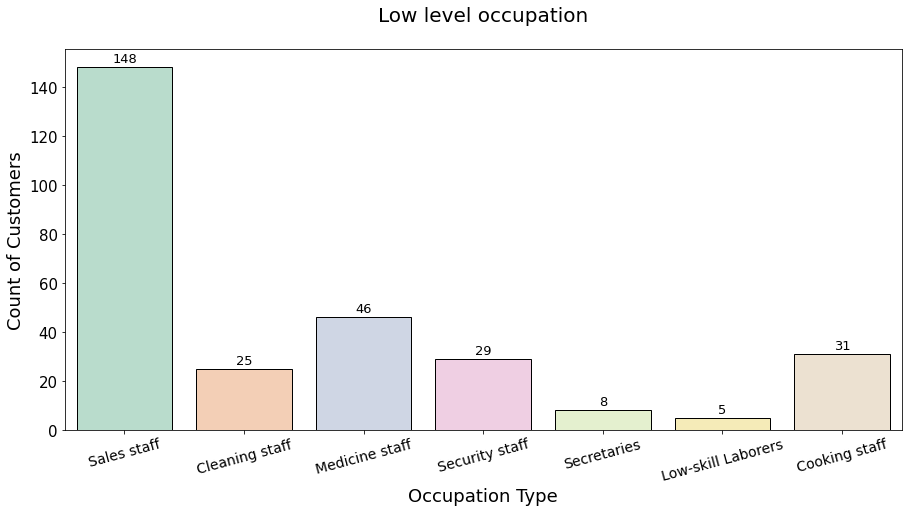

In [69]:
fig, ax = plt.subplots(figsize = (15, 7))

ax= sns.countplot(x = "OCCUPATION_TYPE", data=df2, palette='Pastel2', edgecolor='black')
ax.set_xticklabels (ax.get_xticklabels(), fontsize=14, rotation=15)
plt.xlabel('Occupation Type', fontsize=18)
plt.ylabel('Count of Customers', fontsize=18)
plt.yticks(fontsize=15)
plt.title('Low level occupation\n', fontsize=20)

for r in ax.patches:
    ax.text (r.get_x()+r.get_width()/2, r.get_height()+ 0.75, r.get_height(), 
             horizontalalignment='center', va = 'bottom', fontsize = 13)

In [72]:
df3 = df[((df.AMT_INCOME_TOTAL*12)<df.AMT_CREDIT)]

df4= df3[(df.OCCUPATION_TYPE=='Laborers')|(df.OCCUPATION_TYPE== 'Core staff')|
         (df.OCCUPATION_TYPE== 'Private service staff')|(df. OCCUPATION_TYPE == 'HR staff')|
         (df.OCCUPATION_TYPE== 'High skill tech staff')|(df.OCCUPATION_TYPE== 'Drivers')|
          (df.OCCUPATION_TYPE == 'Realty agents')|(df.OCCUPATION_TYPE=='Accountants')]

len(df4)

C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\3360690312.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4= df3[(df.OCCUPATION_TYPE=='Laborers')|(df.OCCUPATION_TYPE== 'Core staff')|


418

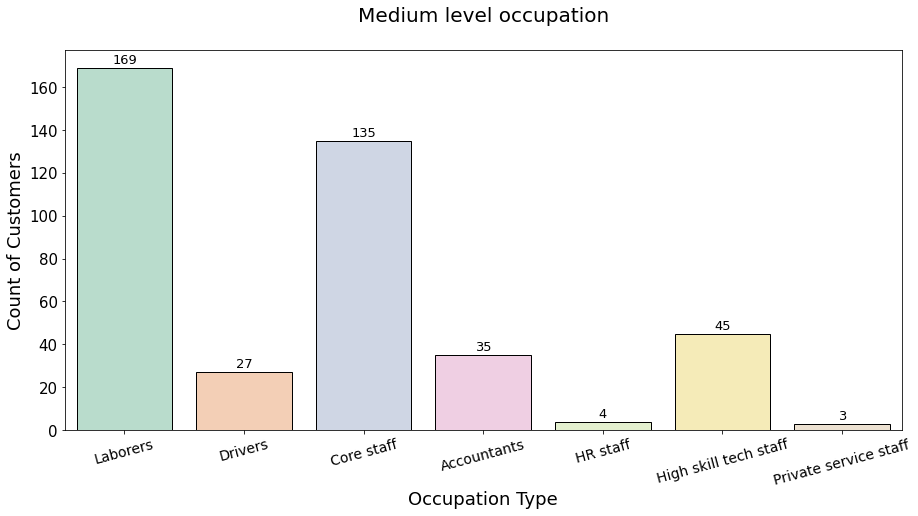

In [74]:
fig, ax = plt.subplots(figsize = (15, 7))

ax= sns.countplot(x = "OCCUPATION_TYPE", data=df4, palette='Pastel2', edgecolor='black')
ax.set_xticklabels (ax.get_xticklabels(), fontsize=14, rotation=15)
plt.xlabel('Occupation Type', fontsize=18)
plt.ylabel('Count of Customers', fontsize=18)
plt.yticks(fontsize=15)
plt.title('Medium level occupation\n', fontsize=20)

for r in ax.patches:
    ax.text (r.get_x()+r.get_width()/2, r.get_height()+ 0.75, r.get_height(), 
             horizontalalignment='center', va = 'bottom', fontsize = 13)

In [86]:
df5 = df[((df.AMT_INCOME_TOTAL*12)<df.AMT_CREDIT)]

df6= df3[(df.OCCUPATION_TYPE=='IT staff')|(df.OCCUPATION_TYPE== 'Managers')]

len(df6)

C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\203686299.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df6= df3[(df.OCCUPATION_TYPE=='IT staff')|(df.OCCUPATION_TYPE== 'Managers')]


42

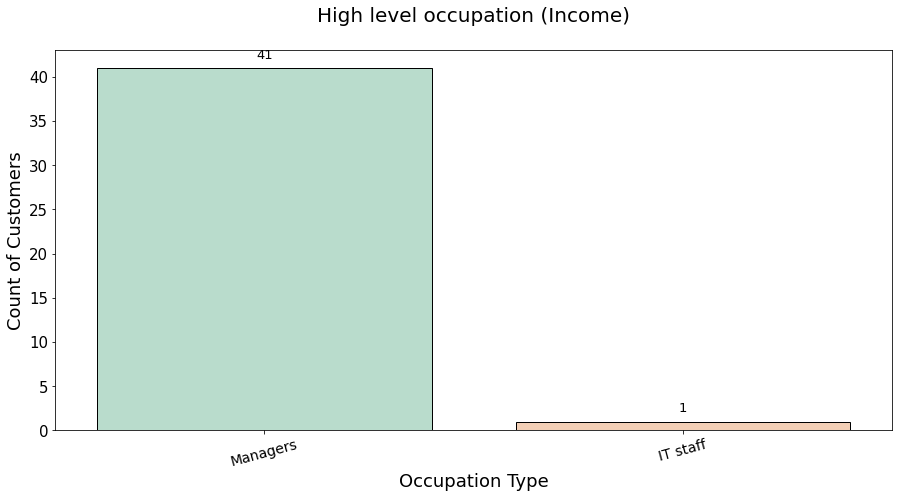

In [87]:
fig, ax = plt.subplots(figsize = (15, 7))

ax= sns.countplot(x = "OCCUPATION_TYPE", data=df6, palette='Pastel2', edgecolor='black')
ax.set_xticklabels (ax.get_xticklabels(), fontsize=14, rotation=15)
plt.xlabel('Occupation Type', fontsize=18)
plt.ylabel('Count of Customers', fontsize=18)
plt.yticks(fontsize=15)
plt.title('High level occupation (Income)\n', fontsize=20)

for r in ax.patches:
    ax.text (r.get_x()+r.get_width()/2, r.get_height()+ 0.75, r.get_height(), 
             horizontalalignment='center', va = 'bottom', fontsize = 13)

In [76]:
gdf= df[(df.AMT_CREDIT>df.AMT_GOODS_PRICE)]
len(df3)

1389

In [77]:
pd.DataFrame({'House': ['Yes', 'Yes', 'No', 'No' ], 'Car': ['Yes', 'No', 'Yes', 'No'], 
              'Count of customers': [len (gdf[(df.Car== 'Y')&(df.House== 'Y')]), 
                                     len(gdf[(df.Car== 'Y')&(df.House=='N')]), 
                                     len (gdf[(df.Car== 'N' )&(df.House=='Y')]), 
                                     len (gdf[(df.Car== 'N')&(df. House=='N')])]})

C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\3004240289.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Count of customers': [len (gdf[(df.Car== 'Y')&(df.House== 'Y')]),
C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\3004240289.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(gdf[(df.Car== 'Y')&(df.House=='N')]),
C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\3004240289.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len (gdf[(df.Car== 'N' )&(df.House=='Y')]),
C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\3004240289.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len (gdf[(df.Car== 'N')&(df. House=='N')])]})


,House,Car,Count of customers
0,Yes,Yes,15110
1,Yes,No,6315
2,No,Yes,30324
3,No,No,12782


In [78]:
corr_df=a.corr()

Text(0.5, 1.0, 'Heatmap of Co-relation')

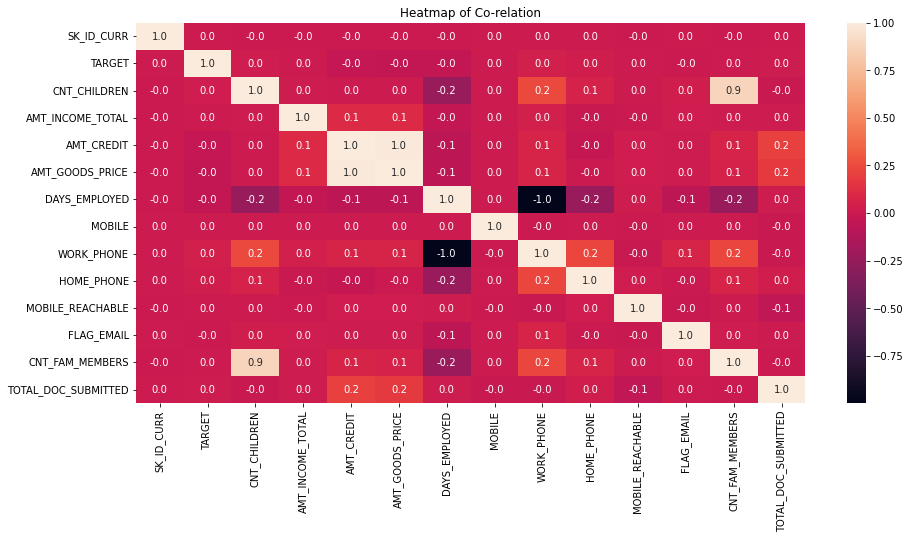

In [79]:
plt.figure(figsize=(15,7))
sns.heatmap(corr_df,annot=True,fmt='.1f',cbar=True).set_title("Heatmap of Co-relation")

<AxesSubplot:>

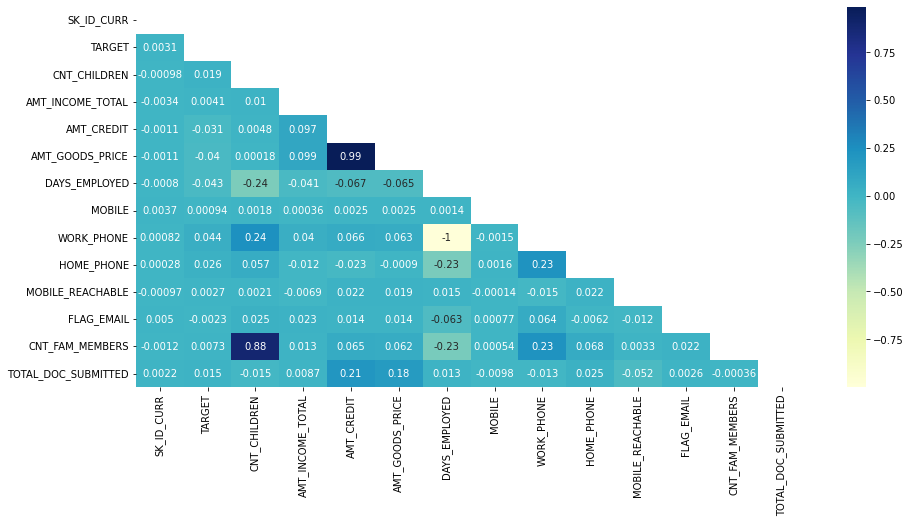

In [84]:
mask = np.triu(np.ones_like(a.corr()))

plt.figure(figsize=(15,7))
sns.heatmap(corr_df, cmap="YlGnBu", annot=True, mask=mask)

C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\1060340355.py:8: UserWarning: Legend does not support '0' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('0- NON Defaulter','1 -Defaulter')
C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\1060340355.py:8: UserWarning: Legend does not support '-' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('0- NON Defaulter','1 -Defaulter')
C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\1060340355.py:8: UserWarning: Legend does not support ' ' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('0- NON Defaulter','1

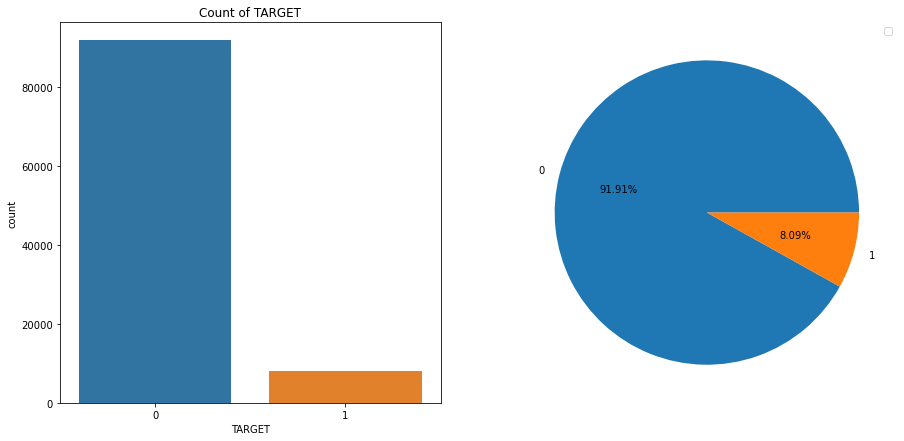

In [91]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Count of TARGET")               
percentage = gd["TARGET"].value_counts()         
labels = list(gd["TARGET"].value_counts().index)

sns.countplot(x = gd["TARGET"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%") 
plt.legend('0- NON Defaulter','1 -Defaulter')

plt.show()

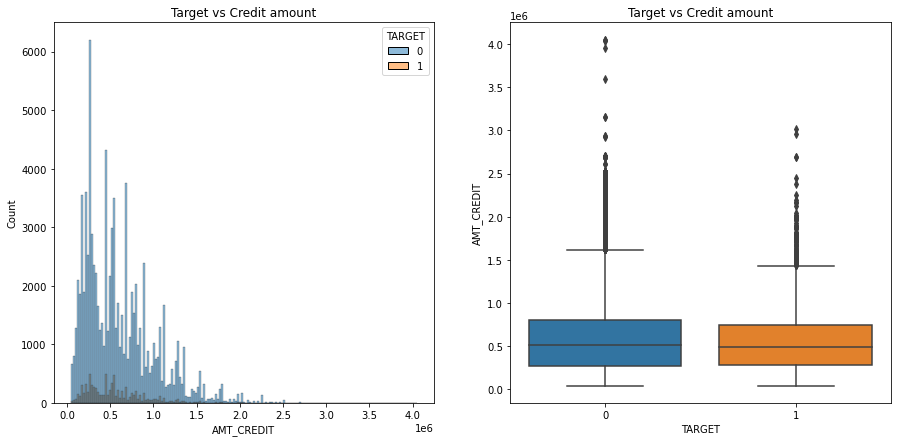

In [93]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_CREDIT"], hue = df["TARGET"], ax = ax[0]).set_title('Target vs Credit amount')
sns.boxplot(y = df["AMT_CREDIT"], x = df["TARGET"], ax = ax[1]).set_title('Target vs Credit amount')
plt.show()

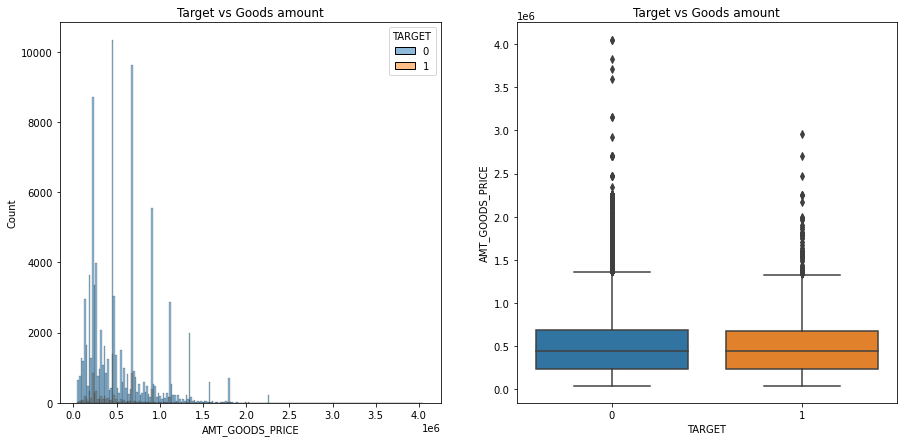

In [95]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_GOODS_PRICE"], hue = df["TARGET"], ax = ax[0]).set_title('Target vs Goods amount')
sns.boxplot(y = df["AMT_GOODS_PRICE"], x = df["TARGET"], ax = ax[1]).set_title('Target vs Goods amount')
plt.show()

In [99]:
fig, ax = plt.subplots(0, 1, 2, figsize = (15, 7))
sns.histplot(x = df["AMT_GOODS_PRICE"], hue = df["TARGET"], ax = ax[0]).set_title('Target vs Goods amount')
sns.boxplot(y = df["AMT_GOODS_PRICE"], x = df["TARGET"], ax = ax[1]).set_title('Target vs Goods amount')
sns.plot.bar(x = df["AMT_GOODS_PRICE"], y = df["TARGET"], ax = ax[2], stacked=True)
plt.show()

TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

In [104]:
plt.bar(x = df["AMT_GOODS_PRICE"], y = df["TARGET"], stacked=True)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

(0.0, 1.0518514121684002)

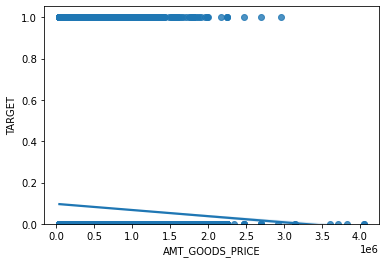

In [106]:
sns.regplot(x= "AMT_GOODS_PRICE", y = "TARGET",data=df)
plt.ylim(0,)

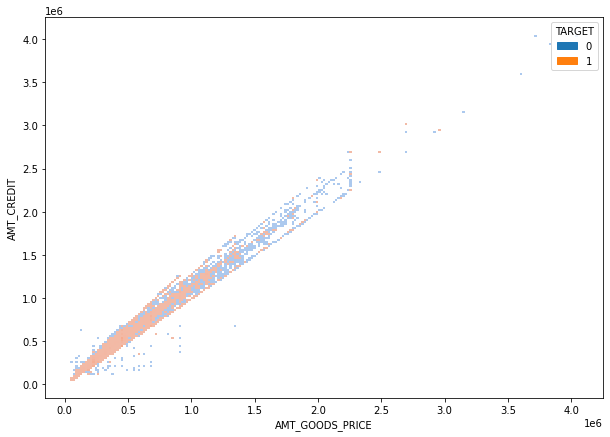

In [110]:
#x='AMT_GOODS_PRICE',y='AMT_CREDIT',hue='TARGET'

fig, ax = plt.subplots(figsize = (10, 7))
sns.histplot(x='AMT_GOODS_PRICE',y='AMT_CREDIT',hue='TARGET', data = df)
plt.show()

In [134]:
de= df[(df['TARGET']==1)]
de

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,...,DAYS_EMPLOYED,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,351000.0,...,-637,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,702000.0,...,-2628,1,1,0,1,0,Cooking staff,1.0,MONDAY,2
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,855000.0,...,-1262,1,1,0,1,0,Laborers,2.0,TUESDAY,1
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,238500.0,...,-3597,1,1,1,1,0,Sales staff,2.0,THURSDAY,1
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,252000.0,...,365243,1,0,0,1,0,NaN,2.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99924,216008,1,Cash loans,M,N,Y,0,247500.0,509400.0,450000.0,...,-586,1,1,0,1,0,NaN,1.0,FRIDAY,1
99932,216017,1,Cash loans,F,N,N,0,180000.0,485640.0,450000.0,...,-767,1,1,1,1,0,Sales staff,2.0,FRIDAY,1
99935,216021,1,Cash loans,F,N,Y,0,243000.0,495882.0,405000.0,...,-1662,1,1,0,1,0,Laborers,2.0,SATURDAY,1
99965,216055,1,Cash loans,F,Y,Y,0,225000.0,809136.0,643500.0,...,-1669,1,1,0,1,0,NaN,2.0,SATURDAY,1


In [115]:
nd= df[(df['TARGET']==0)]

(0.0, 1.0000000000010039)

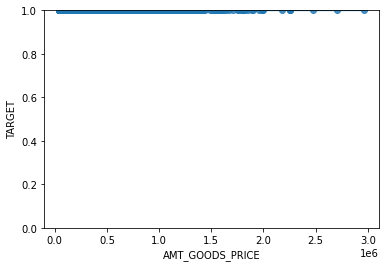

In [132]:
sns.regplot(x= "AMT_GOODS_PRICE", y = "TARGET",data=de)
plt.ylim(0,)

Text(0.5, 1.0, 'Credit amount vs Goods price')

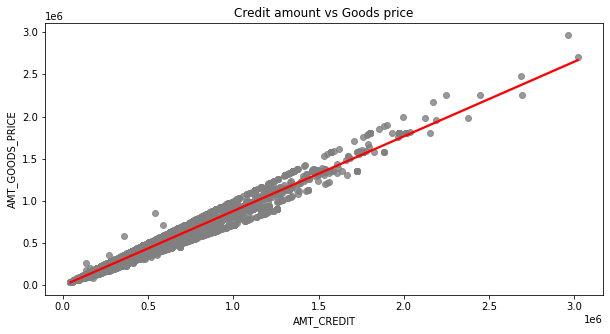

In [137]:
plt.figure(figsize=(10,5))

sns.regplot(y="AMT_GOODS_PRICE", x="AMT_CREDIT", data=de, color="gray", line_kws={"color":"red"}).set_title('Credit amount vs Goods price')



Text(0.5, 1.0, 'Credit amount vs Income amount')

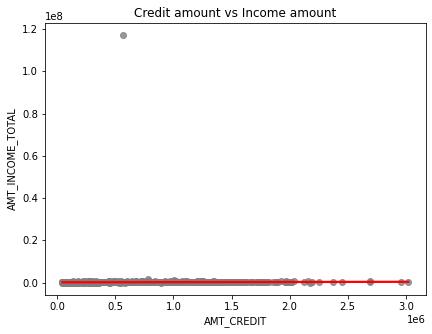

In [128]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.regplot(y="AMT_INCOME_TOTAL", x="AMT_CREDIT", data=de, color="gray", line_kws={"color":"red"}).set_title('Credit amount vs Income amount')

C:\Users\Abdullah Ahamed\AppData\Local\Temp\ipykernel_18448\2671489522.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (ax.get_xticklabels(), fontsize=14, rotation=15)


Text(0.5, 1.0, 'Medium level occupation\n')

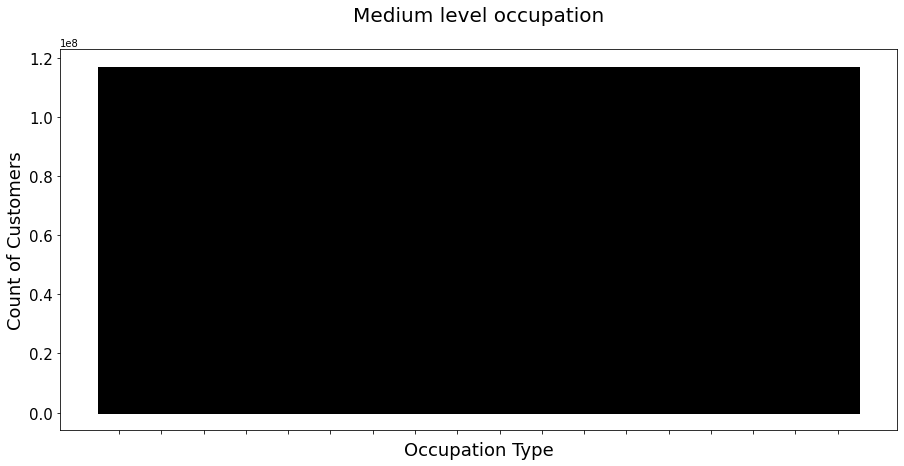

In [142]:
fig, ax = plt.subplots(figsize = (15, 7))

ax= sns.histplot(x = "OCCUPATION_TYPE",y = 'AMT_INCOME_TOTAL', data=de, palette='Pastel2', edgecolor='black')
ax.set_xticklabels (ax.get_xticklabels(), fontsize=14, rotation=15)
plt.xlabel('Occupation Type', fontsize=18)
plt.ylabel('Count of Customers', fontsize=18)
plt.yticks(fontsize=15)
plt.title('Medium level occupation\n', fontsize=20)